source code: https://github.com/ndang01/ndang01.github.io/blob/main/posts/blog1/perceptron.py

# Linearly Separable Data 

Below is an example of some linearly separable data with 2 features on which we will aim to apply the perceptron on. 

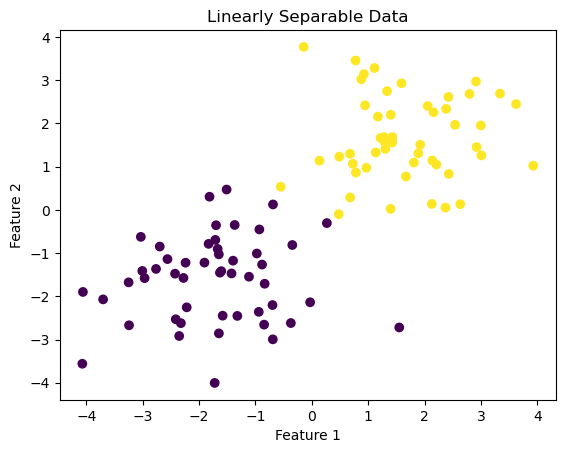

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Linearly Separable Data")

## The Perceptron Algorithm 

The algorithm updates its guesses (weights) as it runs and also keeps a record of its history of accuracy. It processes one example at a time. For a given example, it makes a prediction and checks to see if this prediction is correct. If the prediction is correct, it does nothing. Otherwise, it changes its parameters do better on this example next
time around. The algorithm stops once it reaches a user-specified maximum number of steps or the accuracy is 100%.

## Source Code

The algorithm has three main functions: fit(), predict(), and score().

We pass into fit() a feature matrix $X \in R^{n \times p}$ and a target vector $y \in R^n$. The function updates the weights and keeps track of the history of its accuracy. Its goal is to find a good $\tilde{w}$ to separate the data points. Fit() utilizes the following function when updating its guesses:

$$\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + y_i \tilde{x}_i\;$$


Score() and predict() compares the target variable $y_i$ to the predicted label $\hat{y}_i^{(t)}$. If $\hat{y}^{(t)}_i y_i > 0$, then we do nothing because the point is correctly classified. Otherwise, we perform the update on $\tilde{w}$.


Evolution of the score over the training period:
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


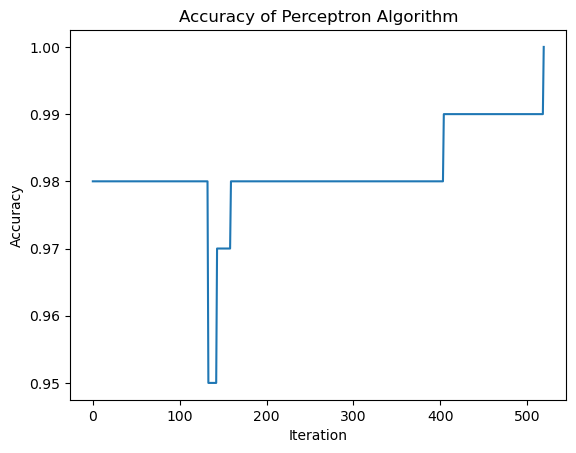

In [2]:
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, max_steps = 1000)

p.w 
print("Evolution of the score over the training period:") 
print(p.history[-10:]) #just the last few scores

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy of Perceptron Algorithm")

## Convergence of the Perceptron Algorithm

After the perceptron algorithm is run, the weight vector $\tilde{w}$ generates a hyperplane that perfectly separates data points from both classes on either side of it.

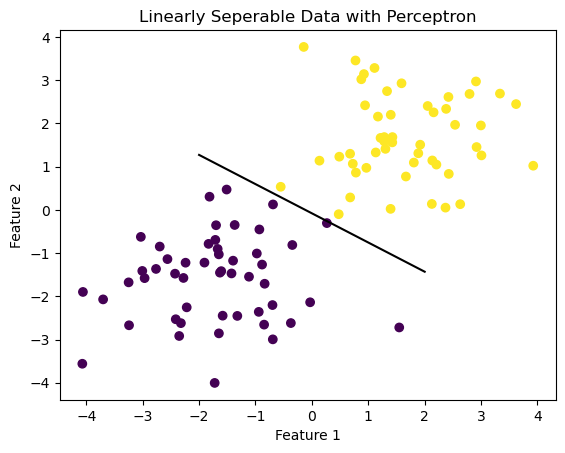

In [3]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.title("Linearly Seperable Data with Perceptron")
plt.savefig("image.jpg")

The score on this data is:

In [4]:
p.score(X, y)

1.0

# Nonseparable Data 

Now suppose that $(X, y)$ is not linearly separable. In this case, the perceptron update will not converge. Below is an example of some nonseparable data with 2 features on which we will apply the perceptron on. 


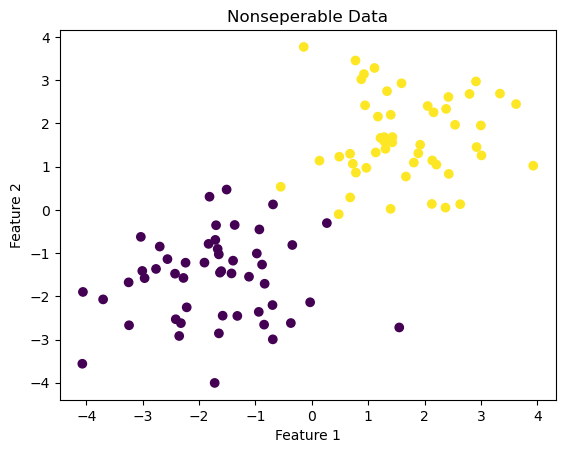

In [5]:
np.random.seed(12345)

n = 100
p_features = 3

X_n, y_n = make_blobs(n_samples = 100,  shuffle=True, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X_n[:,0], X_n[:,1], c = y_n)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Nonseperable Data")

Evolution of the score over the training period:
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0]


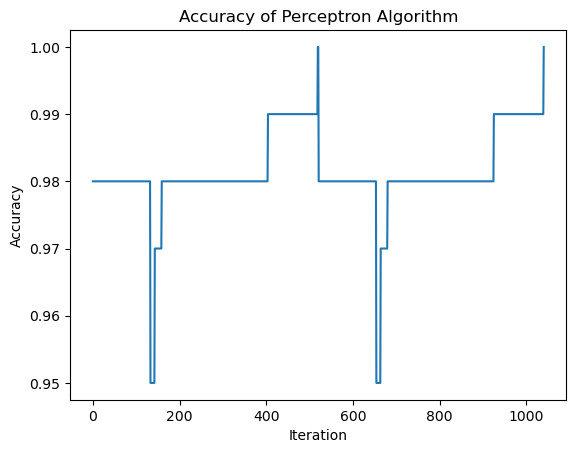

In [6]:
p.fit(X_n, y_n, max_steps = 1000)

p.w
print("Evolution of the score over the training period:") 
print(p.history[-10:]) #just the last few scores

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy of Perceptron Algorithm")

## Nonconvergence of the Perceptron Algorithm

When the data is not linearly separable, the perceptron algorithm will not settle on a final value of $\tilde{w}$ , but will instead run until the maximum number of iterations is reached, without achieving perfect accuracy.

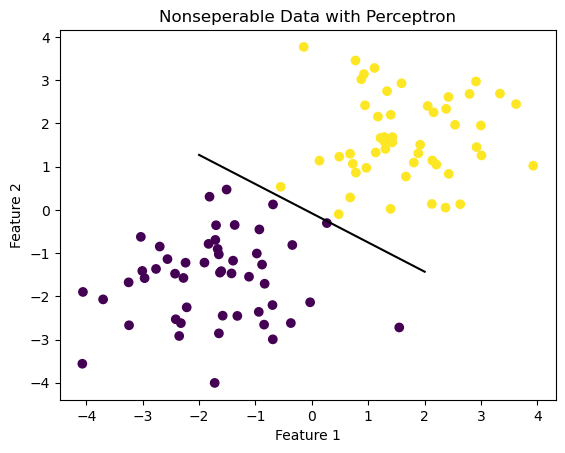

In [7]:
fig = plt.scatter(X_n[:,0], X_n[:,1], c = y_n)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.title("Nonseperable Data with Perceptron")

The score on this data is:

In [8]:
p.score(X, y)

1.0

# Data with More Than 2 Features

The perceptron algorithm can also work in more than 2 dimensions. Below is an example running the algorithm on data with 5 features. 

Evolution of the score over the training period:
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.97, 1.0]


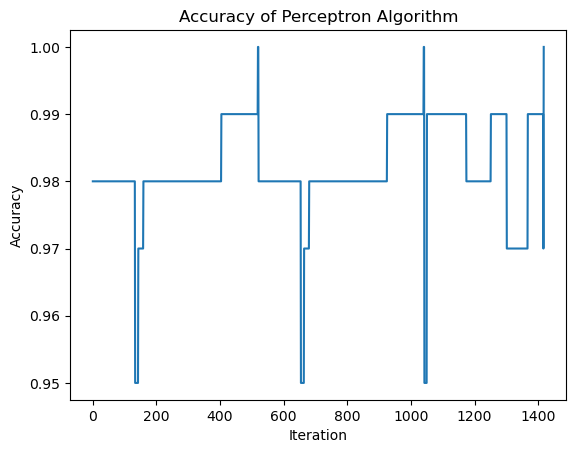

In [9]:
n = 100
p_features = 6
X_5, y_5 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

p.fit(X_5, y_5, max_steps = 1000)

p.w
print("Evolution of the score over the training period:") 
print(p.history[-10:]) #just the last few scores

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy of Perceptron Algorithm")

# Runtime Complexity of Perceptron 

The runtime complexity of a single iteration of the perceptron algorithm update is in constant time. The runtime complexity does not depend on the number of data points, but it does depend on the number of features.